<br><br>

---

_Module 1:  Course 3:  Michigan DS:  Good luck_

---

<br>


```python

# we will use this master function a lot in our notebook...
These are known as utility functions, and they are key to getting things going fast 



# version 1.1

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.ix[:,columns_to_keep].dropna()

    X_crime = crime.ix[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

def plot_decision_tree(clf, feature_names, class_names):
    # This function requires the pydotplus module and assumes it's been installed.
    # In some cases (typically under Windows) even after running conda install, there is a problem where the
    # pydotplus module is not found when running from within the notebook environment.  The following code
    # may help to guarantee the module is installed in the current notebook environment directory.
    #
    # import sys; sys.executable
    # !{sys.executable} -m pip install pydotplus

    export_graphviz(clf, out_file="adspy_temp.dot", feature_names=feature_names, class_names=class_names, filled = True, impurity = False)
    with open("adspy_temp.dot") as f:
        dot_graph = f.read()
    # Alternate method using pydotplus, if installed.
    # graph = pydotplus.graphviz.graph_from_dot_data(dot_graph)
    # return graph.create_png()
    return graphviz.Source(dot_graph)

def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(numpy.arange(c_features), feature_names)

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(numpy.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()


def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = numpy.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = numpy.meshgrid(numpy.arange(x_min-k, x_max+k, h), numpy.arange(y_min-k, y_max+k, h))

    P = clf.predict(numpy.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()
    
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()

def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()
    
    ```

<br>

<br><br>

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [59]:

#-----------------------------------------------------
%matplotlib inline
from matplotlib import cm  
import matplotlib.pyplot as plt
#-----------------------------------------------------
import numpy as np
#-----------------------------------------------------
import pandas as pd
#-----------------------------------------------------
import sklearn
from sklearn.model_selection import train_test_split     
#-----------------------------------------------------
fruits = pd.read_table('fruit_data_with_colors.txt')


In [60]:

!ls -lt


total 159972
-rw-r--r-- 1 jovyan users     810290 Aug 29 16:01 Module_1_TB.ipynb
-rwxrwxrwx 1 nobody nogroup   802439 Aug 29 15:49 Module 1.ipynb
-rwxrwxrwx 1 nobody nogroup  2152703 Aug 27 00:26 Unsupervised Learning.ipynb
-rwxrwxrwx 1 nobody nogroup   397079 Aug 27 00:24 U-MICH-3-W-1.ipynb
-rwxrwxrwx 1 nobody nogroup    34972 Aug 27 00:24 Untitled.ipynb
-rwxrwxrwx 1 nobody nogroup     9314 Aug 27 00:23 Assignment 4.ipynb
-rwxrwxrwx 1 nobody nogroup  1447467 Aug 27 00:16 matplotlib - scatter.ipynb
-rwxrwxrwx 1 nobody nogroup    35265 Aug 27 00:16 Multi-Plot.ipynb
-rwxrwxrwx 1 nobody nogroup   582428 Aug 27 00:16 Module 4.ipynb
-rwxrwxrwx 1 nobody nogroup  1189972 Aug 27 00:10 Module 3.ipynb
-rwxrwxrwx 1 nobody nogroup  1360393 Aug 26 23:58 Classifier Visualization-CleanCopy.ipynb
-rwxrwxrwx 1 nobody nogroup  1408641 Aug 26 23:54 Classifier Visualization.ipynb
-rwxrwxrwx 1 nobody nogroup  1723370 Aug 26 23:02 Module 2.ipynb
-rwxrwxrwx 1 nobody nogroup     1979 Aug 26 23:01 adspy_temp.d

In [66]:

fruits.head(10)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [64]:

print('Number of samples in the data table: ', len(fruits))


Number of samples in the data table:  59


In [67]:

fruits


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [68]:

fruits.fruit_label # the actual label of the fruit  (y-val)


0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

In [70]:

# color score:  number from 0.00 to 1.00 of violet to red in rainbow form ! 
# reverse of ROYGBIV


In [71]:

print(fruits)


    fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      apple          braeburn   172  

In [72]:

fruits.describe()
# should only add up and do stats on columns that have physical numbers


,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [73]:

fruits.shape             #   matrix (m x n)


(59, 7)

In [77]:

# columns
for col in fruits.columns: print(" - ", col)
    

 -  fruit_label
 -  fruit_name
 -  fruit_subtype
 -  mass
 -  width
 -  height
 -  color_score


In [78]:

fruits.count()


fruit_label      59
fruit_name       59
fruit_subtype    59
mass             59
width            59
height           59
color_score      59
dtype: int64

In [79]:

fruits.fruit_label.unique()       
#  spits out just an array in list format of the unique actual values !  1 - 4


array([1, 2, 3, 4])

In [81]:

fruits.fruit_name.unique()


array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [84]:

fruits.query('fruit_label == 1')


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89
10,1,apple,braeburn,166,6.9,7.3,0.93
11,1,apple,braeburn,172,7.1,7.6,0.92
12,1,apple,braeburn,154,7.0,7.1,0.88
13,1,apple,golden_delicious,164,7.3,7.7,0.70
14,1,apple,golden_delicious,152,7.6,7.3,0.69


In [85]:

fruits.color_score.values  # numpy array output 


array([ 0.55,  0.59,  0.6 ,  0.8 ,  0.79,  0.77,  0.81,  0.81,  0.92,
        0.89,  0.93,  0.92,  0.88,  0.7 ,  0.69,  0.69,  0.67,  0.73,
        0.83,  0.85,  0.86,  0.84,  0.87,  0.88,  0.75,  0.75,  0.74,
        0.77,  0.72,  0.81,  0.79,  0.82,  0.8 ,  0.74,  0.75,  0.75,
        0.76,  0.79,  0.77,  0.75,  0.78,  0.79,  0.82,  0.7 ,  0.72,
        0.72,  0.71,  0.72,  0.72,  0.73,  0.71,  0.72,  0.72,  0.74,
        0.71,  0.72,  0.73,  0.72,  0.7 ])

In [96]:

fruits.color_score.values.shape  # 59 x 1 


(59,)

In [88]:

ar = fruits.color_score.values
type(ar)


numpy.ndarray

In [91]:

fruits.color_score.view


<bound method Series.view of 0     0.55
1     0.59
2     0.60
3     0.80
4     0.79
5     0.77
6     0.81
7     0.81
8     0.92
9     0.89
10    0.93
11    0.92
12    0.88
13    0.70
14    0.69
15    0.69
16    0.67
17    0.73
18    0.83
19    0.85
20    0.86
21    0.84
22    0.87
23    0.88
24    0.75
25    0.75
26    0.74
27    0.77
28    0.72
29    0.81
30    0.79
31    0.82
32    0.80
33    0.74
34    0.75
35    0.75
36    0.76
37    0.79
38    0.77
39    0.75
40    0.78
41    0.79
42    0.82
43    0.70
44    0.72
45    0.72
46    0.71
47    0.72
48    0.72
49    0.73
50    0.71
51    0.72
52    0.72
53    0.74
54    0.71
55    0.72
56    0.73
57    0.72
58    0.70
Name: color_score, dtype: float64>

<br>

In [22]:

# create a mapping from fruit label value to fruit name to make results easier to interpret

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   # # # # # # # important  

lookup_fruit_name


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [92]:

# type(lookup_fruit_name)   # dict


In [93]:

lookup_fruit_name.values()


dict_values(['apple', 'mandarin', 'orange', 'lemon'])

In [94]:

lookup_fruit_name.items()    # list out all the mappings i.e. master values ! 


dict_items([(1, 'apple'), (2, 'mandarin'), (3, 'orange'), (4, 'lemon')])

In [95]:

#  use the .items() to view 


<br><br>

The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

## Examining the data

In [28]:
  
# fruits['height']
# 0      7.3
# 1      6.8
# 2      7.2
# 3      4.7
# 4      4.6
# 5      4.3
# 6      4.3
# 7      4.0

#  i want the df, but only the four columns below without a heads as well, just the data ! 
#  fruits[['height', 'width', 'mass', 'color_score']] 

#  X = fruits[['height', 'width', 'mass', 'color_score']]    # double bracket ! 

#  this is the 

#        print(X.height)   # only the height column

# print(X.height[0])   #  prints out the single value xy cross.  i.e. 0th row of the column



# X.iloc[0]  # will in fact spit out the first row, but in a series (pd)
# height           7.30
# width            8.40
# mass           192.00
# color_score      0.55
# Name: 0, dtype: float64

    
# print(X)
#     height  width  mass  color_score
# 0      7.3    8.4   192         0.55
# 1      6.8    8.0   180         0.59
# 2      7.2    7.4   176         0.60
# 3      4.7    6.2    86         0.80
# 4      4.6    6.0    84         0.79
# 5      4.3    5.8    80         0.77
# 6      4.3    5.9    80         0.81
# 7      4.0    5.8    76         0.81
# 8      7.8    7.1   178         0.92
# 9      7.0    7.4   172         0.89

# print(type(X))    <class 'pandas.core.frame.DataFrame'>

# y = fruits['fruit_label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [29]:

#  keep for messing around ! 

# # plotting a scatter matrix
# from matplotlib import cm    #  import color map ! ! ! 

# X = fruits[['height', 'width', 'mass', 'color_score']]

# y = fruits['fruit_label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# cmap = cm.get_cmap('gnuplot')

# scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)


<br>

### Examining

In [97]:

len(fruits)


59

In [118]:

fruits.shape


(59, 7)

In [98]:

.75 * 59 


44.25

In [99]:

.25 * 59


14.75

In [107]:

#create train-test split

X = fruits[['height', 'width', 'mass', 'color_score']]   #  this is X factors or features 
#   df[  [list of cols]  ]

y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)   
# should be 75 25 split by default 


# X_train.shape  =   (44,4)

# y_train.shape  =   (44,)

# X_test.shape =     (15,4)

# y_test.shape  =    (15,)


In [114]:

X


,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79
5,4.3,5.8,80,0.77
6,4.3,5.9,80,0.81
7,4.0,5.8,76,0.81
8,7.8,7.1,178,0.92
9,7.0,7.4,172,0.89


In [115]:

y


0     1
1     1
2     1
3     2
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
Name: fruit_label, dtype: int64

In [108]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape 


((44, 4), (15, 4), (44,), (15,))

In [109]:

len(X_train)


44

In [105]:

y_train.shape


(44,)

In [111]:

X_test


,height,width,mass,color_score
26,9.2,9.6,362,0.74
35,7.9,7.1,150,0.75
43,10.3,7.2,194,0.70
28,7.1,6.7,140,0.72
11,7.6,7.1,172,0.92
2,7.2,7.4,176,0.60
34,7.8,7.6,142,0.75
46,10.2,7.3,216,0.71
40,7.5,7.1,154,0.78
22,7.1,7.3,140,0.87


In [112]:

y_test


26    3
35    3
43    4
28    3
11    1
2     1
34    3
46    4
40    3
22    1
4     2
10    1
30    3
41    3
33    3
Name: fruit_label, dtype: int64

<br>

In [119]:

y_train


42    3
48    4
7     2
14    1
32    3
49    4
29    3
37    3
56    4
18    1
55    4
27    3
15    1
5     2
31    3
16    1
50    4
20    1
51    4
8     1
13    1
25    3
17    1
58    4
57    4
52    4
38    3
1     1
12    1
45    4
24    3
6     2
23    1
36    3
21    1
19    1
9     1
39    3
54    4
3     2
0     1
53    4
47    4
44    4
Name: fruit_label, dtype: int64

In [120]:

X_train


,height,width,mass,color_score
42,7.2,7.2,154,0.82
48,10.1,7.3,174,0.72
7,4.0,5.8,76,0.81
14,7.3,7.6,152,0.69
32,7.0,7.2,164,0.80
49,8.7,5.8,132,0.73
29,7.4,7.0,160,0.81
37,7.3,7.3,154,0.79
56,8.1,5.9,116,0.73
18,7.1,7.5,162,0.83


#### Pair plots only show relationship between two features and not 'all'

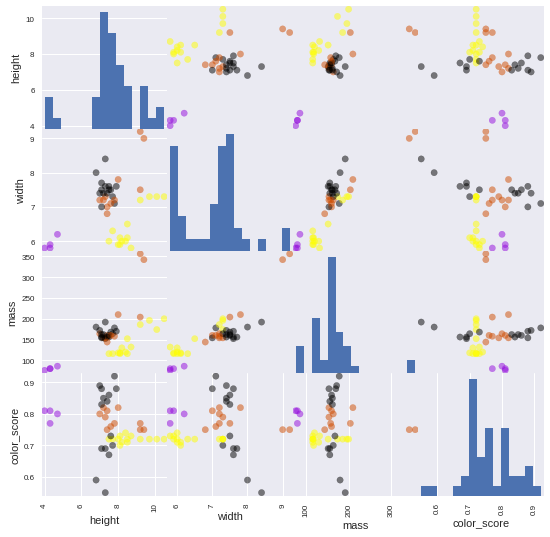

In [116]:

from matplotlib import cm    #  import color map ! ! ! 

cmap = cm.get_cmap('gnuplot')

# by column is the y_train value...


scatter = pd.scatter_matrix(X_train,
                            c= y_train, 
                            marker = 'o', 
                            s=40, 
                            hist_kwds={'bins':15}, 
                            figsize=(9,9), 
                            cmap=cmap)



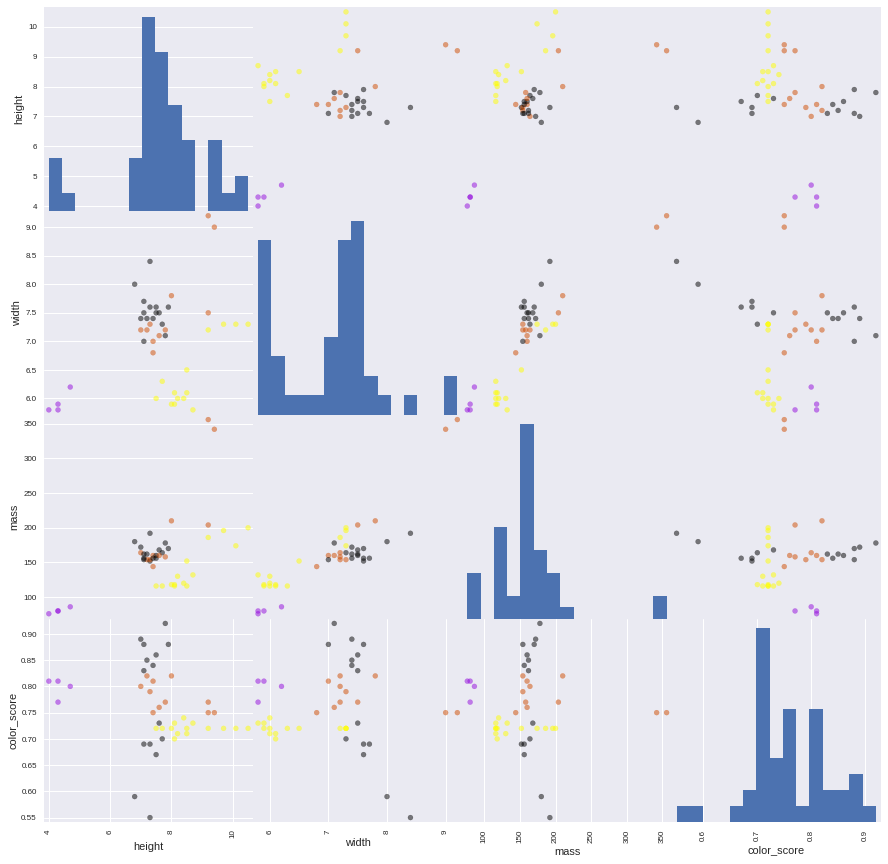

In [117]:

# this will ONLY show two features against each other at a time, NOT 3D or 4D, important to remember
# plotting a scatter matrix

scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=25, hist_kwds={'bins':15}, 
                            figsize=(15,15),
                            cmap=cmap,
                            alpha=0.5)

#  figsize = (small,small)
# to make bigger:  s = 40 ! 


<br><br>

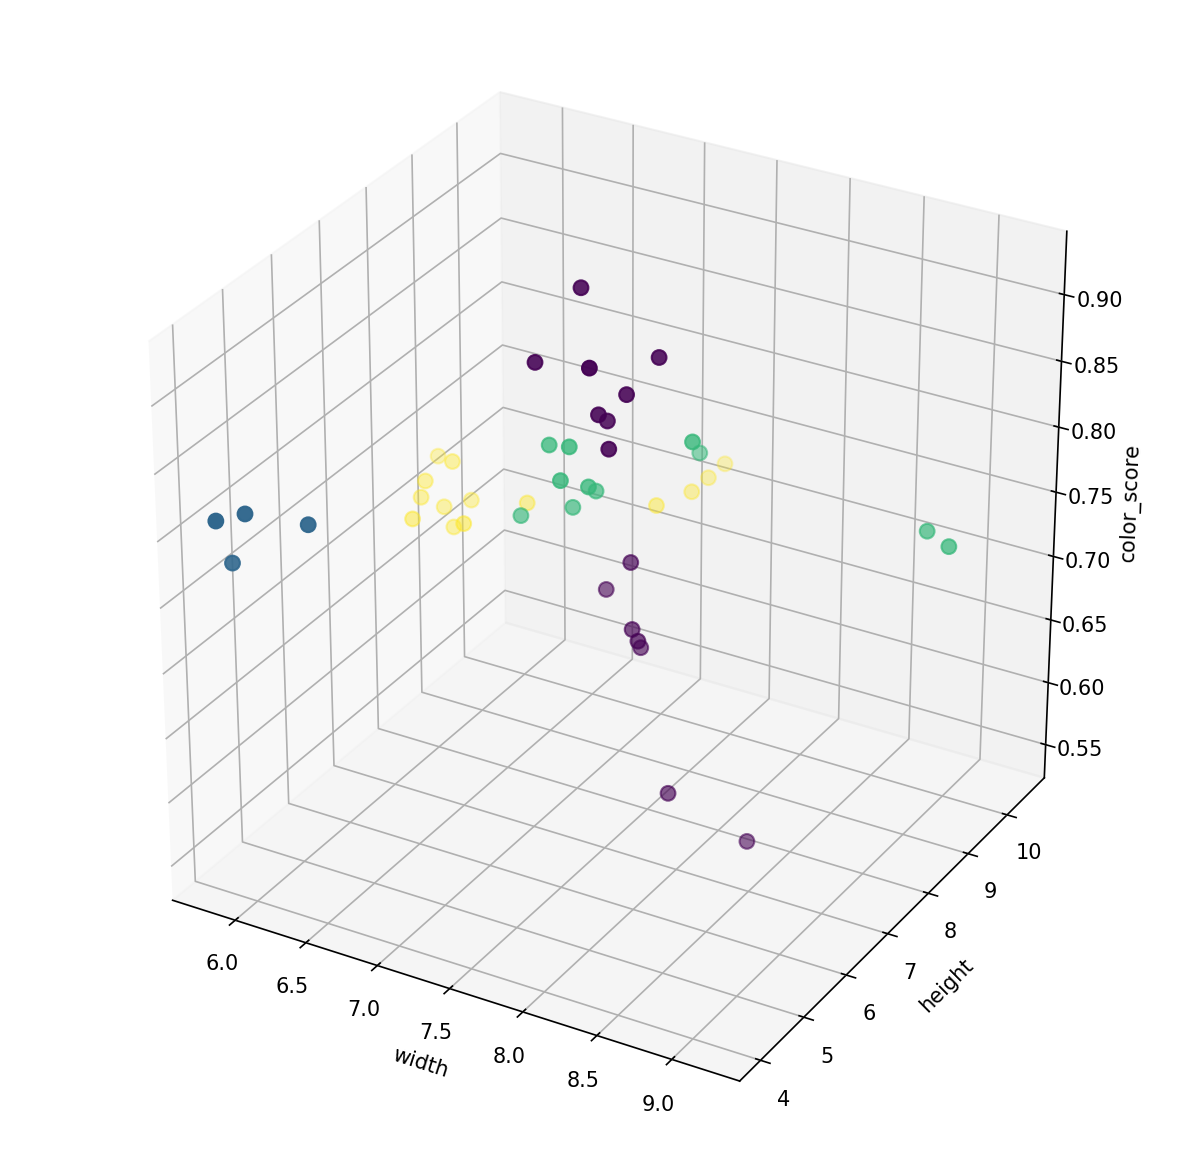

In [41]:

# plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D   
#  < - - - - - use this code line 

fig = plt.figure(figsize=(10,10), dpi=150)

ax = fig.add_subplot(111, projection = '3d')  #  < - - - -  projection = 3D   

ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=50)

ax.set_xlabel('width')

ax.set_ylabel('height')

ax.set_zlabel('color_score')

plt.show(); 


In [42]:

# # For this example, we use the mass, width, and height features of each fruit instance
# X = fruits[['mass', 'width', 'height']]
# #  this is the features of the data set ! (without the label)
# #  this is the feature set.  this COLLECTION OF FEATURES IS CALLED THE FEATURE SPACE ! ! ! 

# y = fruits['fruit_label']    # THIS IS THE LABELS FOR THE INSTANCES IN X ! ! ! 
# # default is 75% / 25% train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


<br><br>

<br><br>

### Chapter:  Create classifier object

###### CREATE AN INSTANCE OF THE CLASSIFIER OBJECT


```

Tom's Notes

-  you will need distance metric
-  you will need how many nearest neighbors to look at 
-  you will need optional weighting function on the neighbor points
-  you will need method for aggregating the classes of neighbor points (simple majority vote, etc)



```



--- 

_if YOU WANTED, you could only look at the mass, width, and height, without looking at color_ 

---

In [128]:

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   # # # # # # # important  

lookup_fruit_name


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Create classifier object

In [129]:

from sklearn.neighbors import KNeighborsClassifier  # CREATE AN INSTANCE OF THIS CLASSIFIER OBJECT

knn = KNeighborsClassifier(n_neighbors = 5)         # NUMBER OF NEIGHBORS 

#  THE KNN VARIABLE'S STATE IS UPDATED AFTER THIS COMMANDS

#  YOU INPUT THE TRAINING SETS, AND IT TRIES TO FIT THEM NEXT 


### Train the classifier (fit the estimator) using the training data

In [131]:

knn.fit(X_train, y_train)   #  TRAIN THE CLASSIFIER BY PASSING IN THE 

#    ALL ESTIMATORS HAVE A FIT METHOD THAT TAKES THE TRAINING DATA, AND CHANGES THE STATE OF THE CLASSIFIER OBJECT 
#    TO ENABLE PREDICTION ONCE THE TRAINING IS FINISHED

#    UDPATES THE STATE OF KNN NEIGHBORS 


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


``` 
Reviewing:
    
    Your output object: 
    
    KNeighborsClassifier(algorithm='auto', 
                         leaf_size=30, 
                         metric='minkowski',
                         metric_params=None,
                         n_jobs=1, 
                         n_neighbors=5, 
                         p=2,
                         weights='uniform')

```

#### Stop:  Let's look at the methods within the knn classifier object

In [133]:

for method in dir(knn):
    if not method.startswith("_"): print(method)


algorithm
classes_
effective_metric_
effective_metric_params_
fit
get_params
kneighbors
kneighbors_graph
leaf_size
metric
metric_params
n_jobs
n_neighbors
outputs_2d_
p
predict
predict_proba
radius
score
set_params
weights


In [135]:

knn.get_params


<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [139]:

knn.algorithm


'auto'

In [142]:

knn.kneighbors_graph


<bound method KNeighborsMixin.kneighbors_graph of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>

In [134]:

knn.classes_


array([1, 2, 3, 4])

In [136]:

knn.p


2

In [138]:

knn.weights


'uniform'


```

knn.Type:        KNeighborsClassifier
String form:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
File:        /opt/conda/lib/python3.6/site-packages/sklearn/neighbors/classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`k_neighbors` queries.

weights : str or callable, optional (default = 'uniform')
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
    Algorithm used to compute the nearest neighbors:

    - 'ball_tree' will use :class:`BallTree`
    - 'kd_tree' will use :class:`KDTree`
    - 'brute' will use a brute-force search.
    - 'auto' will attempt to decide the most appropriate algorithm
      based on the values passed to :meth:`fit` method.

    Note: fitting on sparse input will override the setting of
    this parameter, using brute force.

leaf_size : int, optional (default = 30)
    Leaf size passed to BallTree or KDTree.  This can affect the
    speed of the construction and query, as well as the memory
    required to store the tree.  The optimal value depends on the
    nature of the problem.

metric : string or DistanceMetric object (default = 'minkowski')
    the distance metric to use for the tree.  The default metric is
    minkowski, and with p=2 is equivalent to the standard Euclidean
    metric. See the documentation of the DistanceMetric class for a
    list of available metrics.

p : integer, optional (default = 2)
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
    Additional keyword arguments for the metric function.

n_jobs : int, optional (default = 1)
    The number of parallel jobs to run for neighbors search.
    If ``-1``, then the number of jobs is set to the number of CPU cores.
    Doesn't affect :meth:`fit` method.

Examples
--------
>>> X = [[0], [1], [2], [3]]
>>> y = [0, 0, 1, 1]
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y) # doctest: +ELLIPSIS
KNeighborsClassifier(...)
>>> print(neigh.predict([[1.1]]))
[0]
>>> print(neigh.predict_proba([[0.9]]))
[[ 0.66666667  0.33333333]]

See also
--------
RadiusNeighborsClassifier
KNeighborsRegressor
RadiusNeighborsRegressor
NearestNeighbors

Notes
-----
See :ref:`Nearest Neighbors <neighbors>` in the online documentation
for a discussion of the choice of ``algorithm`` and ``leaf_size``.

.. warning::

   Regarding the Nearest Neighbors algorithms, if it is found that two
   neighbors, neighbor `k+1` and `k`, have identical distances
   but different labels, the results will depend on the ordering of the
   training data.

https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm

```
    

In [137]:

# knn # use shift + tab to get explanation 



```
Type:        KNeighborsClassifier
String form:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
File:        /opt/conda/lib/python3.6/site-packages/sklearn/neighbors/classification.py
Docstring:  
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, optional (default = 5)
    Number of neighbors to use by default for :meth:`k_neighbors` queries.

weights : str or callable, optional (default = 'uniform')
    weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
      containing the weights.

algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, optional
    Algorithm used to compute the nearest neighbors:

    - 'ball_tree' will use :class:`BallTree`
    - 'kd_tree' will use :class:`KDTree`
    - 'brute' will use a brute-force search.
    - 'auto' will attempt to decide the most appropriate algorithm
      based on the values passed to :meth:`fit` method.

    Note: fitting on sparse input will override the setting of
    this parameter, using brute force.

leaf_size : int, optional (default = 30)
    Leaf size passed to BallTree or KDTree.  This can affect the
    speed of the construction and query, as well as the memory
    required to store the tree.  The optimal value depends on the
    nature of the problem.

metric : string or DistanceMetric object (default = 'minkowski')
    the distance metric to use for the tree.  The default metric is
    minkowski, and with p=2 is equivalent to the standard Euclidean
    metric. See the documentation of the DistanceMetric class for a
    list of available metrics.

p : integer, optional (default = 2)
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
    Additional keyword arguments for the metric function.

n_jobs : int, optional (default = 1)
    The number of parallel jobs to run for neighbors search.
    If ``-1``, then the number of jobs is set to the number of CPU cores.
    Doesn't affect :meth:`fit` method.

Examples
--------
>>> X = [[0], [1], [2], [3]]
>>> y = [0, 0, 1, 1]
>>> from sklearn.neighbors import KNeighborsClassifier
>>> neigh = KNeighborsClassifier(n_neighbors=3)
>>> neigh.fit(X, y) # doctest: +ELLIPSIS
KNeighborsClassifier(...)
>>> print(neigh.predict([[1.1]]))
[0]
>>> print(neigh.predict_proba([[0.9]]))
[[ 0.66666667  0.33333333]]

See also
--------
RadiusNeighborsClassifier
KNeighborsRegressor
RadiusNeighborsRegressor
NearestNeighbors

Notes
-----
See :ref:`Nearest Neighbors <neighbors>` in the online documentation
for a discussion of the choice of ``algorithm`` and ``leaf_size``.

.. warning::

   Regarding the Nearest Neighbors algorithms, if it is found that two
   neighbors, neighbor `k+1` and `k`, have identical distances
   but different labels, the results will depend on the ordering of the
   training data.

https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm
    ```

<br>

<br><br><br>

### Estimate the accuracy of the classifier on future data, using the test data

In [45]:

knn.score(X_test, y_test)

#  APPLY THE CLASSIFER TO ALL THE DATA FROM THE TEST SET WE PUT ASIDE AND SEE OUTPUT 

#  SO THIS WILL COMPUTE THE ACCURACY 

#  THE PERCENTAGE OF   .  TEST POINTS AS INPUT

#  FRACTION CORRECTLY PREDICTED. 


0.53333333333333333

In [46]:

print(knn)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [47]:

print(knn.score(X_test,y_test))


0.533333333333


<br>

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [50]:

# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm

fruit_prediction = knn.predict([[20, 4.3, 150, 5.5]])

lookup_fruit_name[fruit_prediction[0]]

# should predict its a mandarin


'apple'

In [51]:

# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5, 5.5]])


lookup_fruit_name[fruit_prediction[0]]
# should predict its a lemon


'mandarin'

<br>

<br>

### Plot the decision boundaries of the k-NN classifier

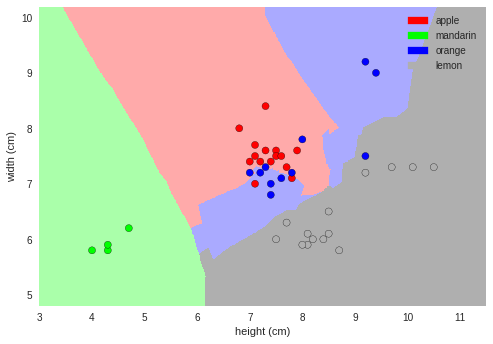

In [52]:

from adspy_shared_utilities import plot_fruit_knn
#  UTILITY FUNCTION.  SHARED UTILITIES MODULE   COLORED PLOTS

plot_fruit_knn(X_train, y_train, 5, 'uniform')   
# we choose 5 nearest neighbors OR 7 OR WHATEVER, KEEP 5 AS ORIGINAL.
# UNIFORM MEAN:  TREAT ALL NEIGHBORS EQUALLY WHEN COMBINING THEIR LABELS


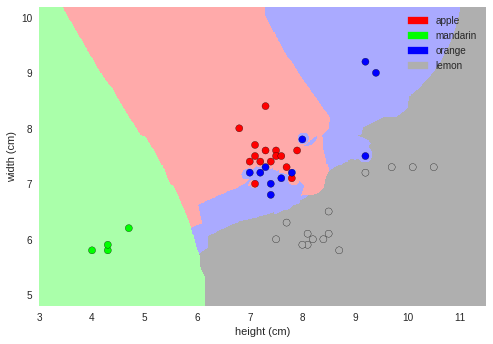

In [53]:
from adspy_shared_utilities import plot_fruit_knn
#  UTILITY FUNCTION.  SHARED UTILITIES MODULE
#  COLORED PLOTS

plot_fruit_knn(X_train, y_train, 5, 'distance')   # we choose 5 nearest neighbors OR 7 OR WHATEVER, KEEP 5 AS ORIGINAL.
# UNIFORM MEAN:  TREAT ALL NEIGHBORS EQUALLY WHEN COMBINING THEIR LABELS

<br><br>

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

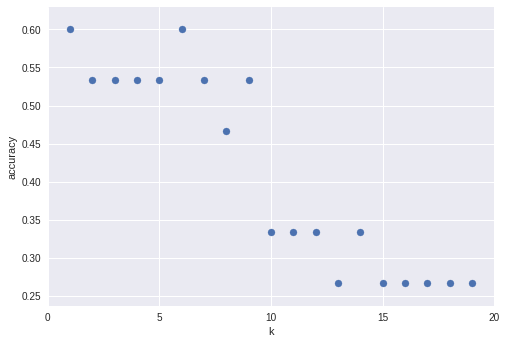

In [54]:

# i want to plot the accuracy as i change the k value ! ! ! ! 


k_range = range(1,20)

scores = []



# for each k value from 1 thru 20, create the classifier object with that assumption, 
# then fit the standard data, and then create a list of the score you get as you 
# put in the test values.  you are knn.scoring it so to speak. 
# then print those x,y values out (where x = k values and y = accuracy value)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

    
    
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);


# larger values of k lead to worse accuracy ! ! ! ! 
# default split is going to be 75/25 here... 


<br>

### How sensitive is k-NN classification accuracy to the train/test split proportion?

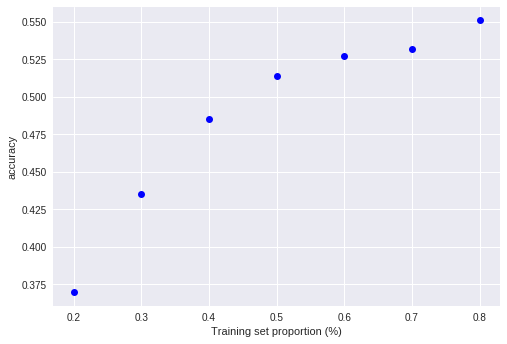

In [55]:

t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()


for s in t:

    scores = []
    
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

# this is really smart to pull off ! ! ! ! ! 
# you need to do this more often ! 



<br>

<br><br>

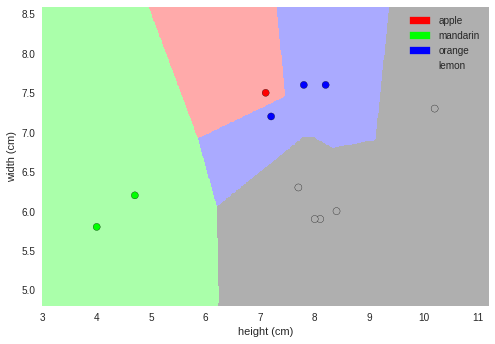

In [56]:

from adspy_shared_utilities import plot_fruit_knn
#  UTILITY FUNCTION.  SHARED UTILITIES MODULE
#  COLORED PLOTS

plot_fruit_knn(X_train, y_train, 1, 'distance')   
# we choose 5 nearest neighbors OR 7 OR WHATEVER, KEEP 5 AS ORIGINAL.
# UNIFORM MEAN:  TREAT ALL NEIGHBORS EQUALLY WHEN COMBINING THEIR LABELS


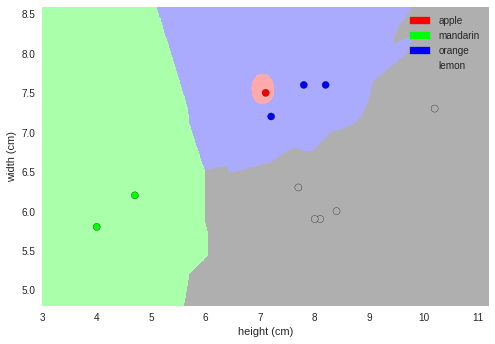

In [57]:

from adspy_shared_utilities import plot_fruit_knn
#  UTILITY FUNCTION.  SHARED UTILITIES MODULE
#  COLORED PLOTS

plot_fruit_knn(X_train, y_train, 5, 'distance')   # we choose 5 nearest neighbors OR 7 OR WHATEVER, KEEP 5 AS ORIGINAL.
# UNIFORM MEAN:  TREAT ALL NEIGHBORS EQUALLY WHEN COMBINING THEIR LABELS


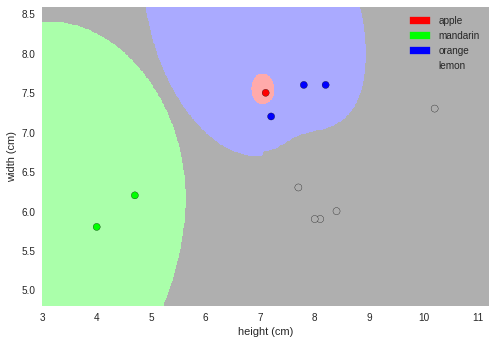

In [58]:

from adspy_shared_utilities import plot_fruit_knn
#  UTILITY FUNCTION.  SHARED UTILITIES MODULE
#  COLORED PLOTS

plot_fruit_knn(X_train, y_train, 10, 'distance')   # we choose 5 nearest neighbors OR 7 OR WHATEVER, KEEP 5 AS ORIGINAL.
# UNIFORM MEAN:  TREAT ALL NEIGHBORS EQUALLY WHEN COMBINING THEIR LABELS


<br><br>

<br><br>

#### Examining the core function - Tom not importing but understanding core function

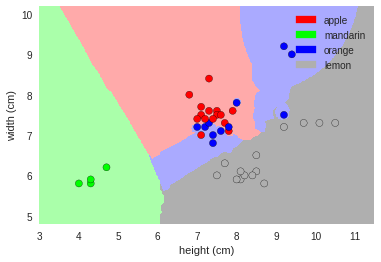

In [125]:

import numpy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches




def plot_fruit_knn_TB(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    
    clf.fit(X_mat, y_mat)

    
    
    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    
    
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    
    
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])


    
    
    plt.xlabel('height (cm)')
    
    plt.ylabel('width (cm)')

    plt.show()

    
plot_fruit_knn_TB(X_train, y_train, 7, 'distance')   
# UNIFORM MEAN:  TREAT ALL NEIGHBORS EQUALLY WHEN COMBINING THEIR LABELS


    